# Introduction and Background

Jeopardy! is one of the United States' longest running, general knowledge, trivia game shows. The show consists of the host, currently Alex Trebek, reading clues to contestants and the contestants have to guess what question the clue is the answer to. This is why all Jeopardy! answers are phrased in the form of a question.

There have been several contestants who have dominated the game using various tactics. One contestant, Ken Jennings, went on the longest Jeopardy! winning streak in the show's history. It was not just because Jennings had an encyclopedic mind with perfect recall, he also employed certain game theory tactics in order to maximize his daily winnings, which was how the winner was determined. At the end of the game, the player with the highest earnings wins, and moves on to the next day. Another player, Arthur Chu, became popular after going on a short winning streak using an unorthadox strategy with seemingly arbitrary wagers on the Daily Double questions. Chu also noted that there was a pattern: certain answers/clues would be more likely to appear in certain categories. 

The goal of this project is to determine whether or not there is an optimal strategy to preparing to be a contestant on Jeopardy!

This question is of particular interest to one of our group members, Brandon Nguyen, who was a former contestant of another game show and is an avid Jeopardy fan. During his time watching and follow Jeopardy, Brandon has noticed that some of the most successful Jeopardy players had very obvious strategies in order to go on massive winning streaks. After the successes of people such as Jennings and Chu, we would like to see if there is truth in their observations about the game.

Our goal is to find out which subjects a potential Jeopardy! contestant should study in order to maximize his or her performance on the game show. We are interested in whether trends in past Jeopardy! clues, categories, and answers could help guide a contestant's studying. We hypothesize that the frequencies of certain groups of clues, categories, and answers will be significant enough to discern the best subjects to study when preparing for Jeopardy!. In order to test our hypothesis, we will categorize clues and answers by subject and examine the frequency, or number of occurrances of subjects, both over the lifetime of the game-show and by year.

To organize our analysis and discussion, we will define our list of subjects: Culture, Geography, History, and Science.

# Data Description  


We will be using data from the Jeopardy Archives, which was consolidated by a Reddit user named trexmatt. Using a data scraper, trexmatt has compiled a CSV file containing over 200,000 observations which include: show numner, show air date, the round a question was asked, clue category, clue monetary value, the clue itself, and the answer (which would be phrased as a question). By analyzing this data, we hope to uncover any underlying patterns hidden away in the clues of the game.

To make our phrasing more intuitive, from now on, the clue will be referred to as the question.

The CSV file contains the question as a whole, and the answer column has the answer to the clue without the leading words that would make the phrasing a question. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('JEOPARDY_CSV.csv')

In [3]:
df.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
df.tail(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo
216929,4999,2006-05-11,Final Jeopardy!,HISTORIC NAMES,None,A silent movie title includes the last name of...,Grigori Alexandrovich Potemkin


# Data Cleaning and Pre-Processing
Before analyzing the data set, we need to do some data cleaning and pre-processing. Firstly, we decided to drop some of the columns that we will not be using in our analysis. The columns that we dropped are the Show Number and the Question columns. The columns that we cleaned up are the Air Dates, Value, and Answer columns. We did some processing on the Air Date column and extracted the year out of each observation, and in our cleaned up dataframe we renamed the Air Date column to year. For the Value column, we processed the money value by removing the dollar sign and commas, and we converted the type to be an integer. Additionally, we standardized each observation's money value by dividing by 2 for Double Jeopardy! questions. 

The Answer column proved to be the most difficult to clean. For this column, we cleaned each observation by removing quotes, parentheses and leading "a", "an", and "the" when appropriate. After removing those, we stripped the answers of any leading and trailing whitespace. Finally, we converted all the answers to lower case. Because we plan to analyze the uniqueness and frequency the answers, it is important to standardize the answers as best as possible. We cleaned the answers to the best of our ability, but it is not perfect. The messiness of the original answers makes it hard for us to clean the answers. For example, some of the answers with parentheses in them made it hard to tell which answers were the same as others. 

The following are some answers that will illustrate our problem:<br>
Ceylon (or Sri Lanka)<br>
Ceylon

In this case, we thought it would be best to completely remove the parentheses AND the content within them. Then, the answers would both be standardized to Ceylon. 

(Vladimir) Putin<br>
Vladimir Putin<br>

In this case, we only want to remove the parentheses, but keep the content within them. Then both answers would be standardized to Vladimir Putin.

Since the answers are so messy, we could not come up with a set of rules that would clean up and correctly standardize all the answers. In the end, we made the decision to only remove the parentheses. This helps in many cases, but it is not perfect.

In [5]:
def cleanAnswer(answer):
    answer = answer.replace('"', "")
    answer = answer.replace('(', "")
    answer = answer.replace(')', "")
    split = answer.split(' ', 1)
    firstWord = split[0]
    if len(split) == 2 and (firstWord == 'an' or firstWord == 'a' or firstWord == 'the'):
        answer = split[1]
    
    answer.strip()
    answer = answer.lower()
    return answer

In [6]:
# test clean method
print(cleanAnswer(' HELLO '), cleanAnswer('"A Streetcar Named Desire"'), cleanAnswer('the'), cleanAnswer('(Vladimir) Putin'))

 hello  a streetcar named desire the vladimir putin


In [7]:
def cleanDate(date):
    return date[:4]

In [8]:
def convertValues(cost):
    if cost == "None":
        return 0
    cost = cost.replace("$", '')
    cost = cost.replace(',','')
    cost = int(cost)
    return cost

In [9]:
dfClean = pd.DataFrame()
#dfClean.columns = ['Year', 'Round', 'Category', 'Value', 'Answer']
dfClean['year'] = df[' Air Date'].apply(cleanDate)
dfClean['round'] = df[' Round']
dfClean['category'] = df[' Category']
dfClean['value'] = df[' Value'].apply(convertValues)
dfClean['answer'] = df[' Answer'].apply(cleanAnswer)
display(dfClean)
dfClean.to_csv('jeopardyDFClean.csv')

,year,round,category,value,answer
0,2004,Jeopardy!,HISTORY,200,copernicus
1,2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,jim thorpe
2,2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,arizona
3,2004,Jeopardy!,THE COMPANY LINE,200,mcdonald's
4,2004,Jeopardy!,EPITAPHS & TRIBUTES,200,john adams
5,2004,Jeopardy!,3-LETTER WORDS,200,ant
6,2004,Jeopardy!,HISTORY,400,appian way
7,2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400,michael jordan
8,2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400,washington
9,2004,Jeopardy!,THE COMPANY LINE,400,crate & barrel


PermissionError: [Errno 13] Permission denied: 'jeopardyDFClean.csv'

# Data Visualization

In order to put our hypothesis to the test, we want to find out which categories and answers are the most common, as those would be good subjects to study in prepartion of competing on Jeopardy!. 

To get a sense of how the most common answers and categories vary (or not) in frequency over time, we will create two heat maps. The first will be a graph with answers on the y axis and year on the x axis. The second will be a graph with categories on the y axis and year on the x axis. Both graphs will be colored based on how many times the answer or category appeared in a given year.

In [10]:
minYear = int(dfClean['year'].min())
maxYear = int(dfClean['year'].max())

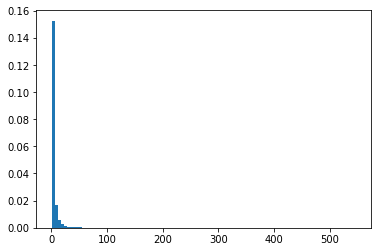

In [11]:
allCatCounts = dfClean['category'].value_counts()
fig1 = plt.gcf()
plt.hist(allCatCounts, normed=True, bins=100)
plt.show()

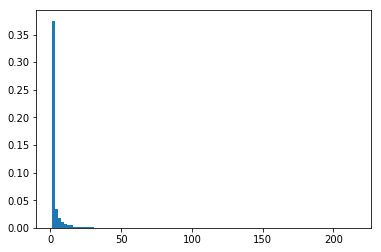

In [12]:
allAnswerCounts = dfClean['answer'].value_counts()
fig2 = plt.gcf()
plt.hist(allAnswerCounts, normed=True, bins=100)
plt.show()

In [13]:
catTop = dfClean['category'].value_counts()[:25]

In [14]:
cats = []

for year in range(minYear, maxYear+1):
    yearCats = dfClean[dfClean['year']==str(year)]
    countsInYear = []
    for i in range(0, len(catTop)):
        cat = yearCats[yearCats['category']==catTop.index[i]]
        countsInYear.append(len(cat))
    
    cats.append(countsInYear)
    
cats = np.transpose(cats)

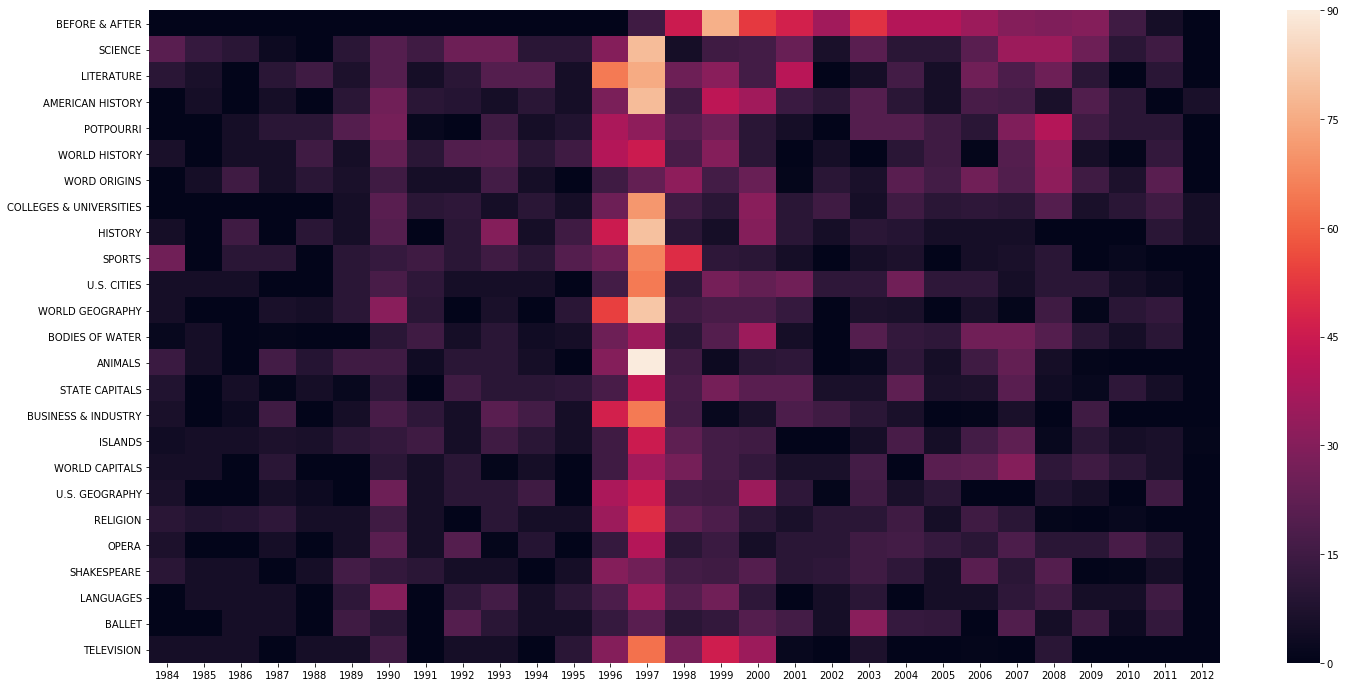

In [15]:
plt.figure(figsize=(24,12))
fig3 = sns.heatmap(cats, annot=False, fmt="d")

fig3.set_xticklabels(range(1984,2012+1))
fig3.set_yticklabels(catTop.index, rotation=0)
plt.show()

In [16]:
answerTop = dfClean['answer'].value_counts()[:25]

In [17]:
answers = []

for year in range(minYear, maxYear+1):
    yearAnswers = dfClean[dfClean['year']==str(year)]
    answerCountsInYear = []
    for i in range(0, len(answerTop)):
        answer = yearAnswers[yearAnswers['category']==answerTop.index[i]]
        answerCountsInYear.append(len(cat))
    
    answers.append(answerCountsInYear)
    
answers = np.transpose(answers)

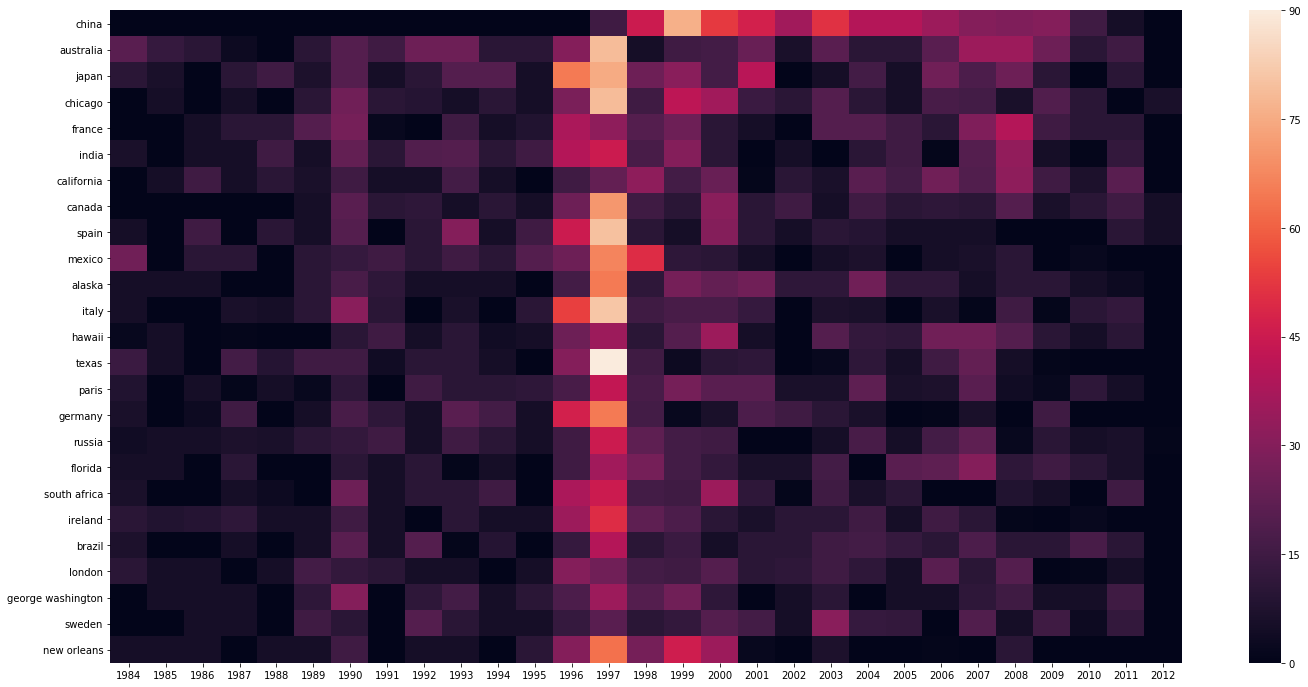

In [18]:
plt.figure(figsize=(24,12))
fig4 = sns.heatmap(cats, annot=False, fmt="d")

fig4.set_xticklabels(range(1984,2012+1))
fig4.set_yticklabels(answerTop.index, rotation=0)
plt.show()

# Data Analysis and Results

In [19]:
answers = dfClean['answer']

In [20]:
answers.unique()

array(['copernicus', 'jim thorpe', 'arizona', ..., 'thrushes', 'anaïs nin',
       'grigori alexandrovich potemkin'], dtype=object)

In [21]:
len(answers.unique())

69089

In [22]:
answers.unique()[:10]

array(['copernicus', 'jim thorpe', 'arizona', "mcdonald's", 'john adams',
       'ant', 'appian way', 'michael jordan', 'washington',
       'crate & barrel'], dtype=object)

In [23]:
answers.unique()[-10:]

array(['reapers', 'a&p', 'electoral college vote', 'hg',
       'you are so beautiful', 'laurens hammond', 'rowls', 'thrushes',
       'anaïs nin', 'grigori alexandrovich potemkin'], dtype=object)

In [24]:
counts = answers.value_counts()

In [25]:
answers.describe()

count     216930
unique     69089
top        china
freq         216
Name: answer, dtype: object

In [26]:
print('Mean of counts: ' + str(counts.mean()))
print('Mode of counts: ' + str(counts.mode()[0]))
print('Median of counts: ' + str(counts.median()))

Mean of counts: 3.139863075163919
Mode of counts: 1
Median of counts: 1.0


In [27]:
print('How many answers appear exactly once? : ' + str(len(counts[counts == 1])))
print('How many answers appear twice? : ' + str(len(counts[counts == 2])))
print('How many answers appear 5 or more times? : ' + str(len(counts[counts >= 5])))
print('How many answers appear 10 or more times? : ' + str(len(counts[counts >= 10])))
print('How many answers appear 50 or more times? : ' + str(len(counts[counts >= 50])))
print('How many answers appear 100 or more times? : ' + str(len(counts[counts >= 100])))
print('How many answers appear 150 or more times? : ' + str(len(counts[counts >= 150])))
print('How many answers appear 200 or more times? : ' + str(len(counts[counts >= 200])))

How many answers appear exactly once? : 40698
How many answers appear twice? : 9914
How many answers appear 5 or more times? : 10329
How many answers appear 10 or more times? : 4203
How many answers appear 50 or more times? : 228
How many answers appear 100 or more times? : 50
How many answers appear 150 or more times? : 14
How many answers appear 200 or more times? : 2


In [28]:
print('The occurrance rate of the most common answer (' + str(counts.keys()[0]) + '): ' + str((counts[0]/len(answers))*100) + '% ')

The occurrance rate of the most common answer (china): 0.099571290278% 


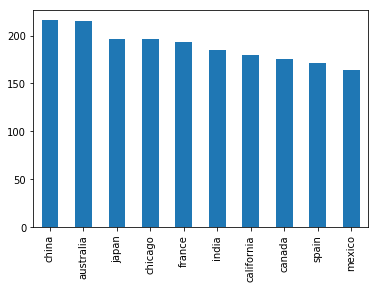

In [29]:
counts[:10].plot(kind='bar')

fig5 = plt.gcf()
fig5

In [30]:
(len(answers[answers.str.isnumeric()])/len(answers))*100

0.8297607523164154

In [31]:
categories = dfClean['category']
categoryCounts = categories.value_counts()
uniqueCat = categories.unique()
print("Number of unique categories: " + str(len(uniqueCat)))

Number of unique categories: 27995


# Category Analysis
First, we want to know what the most common categories are.
Listing them here (and categorizing with a quick look), we can see that all 4 of the subjects in our list are common.

In [32]:
countCats = categories.value_counts()

# Privacy/Ethics Considerations

The data we used raises little to no ethics or privacy considerations.

We had full permission to use the data as noted on the original Reddit thread, so long as we give the original poster credit and let them know of our project.

In terms of bias in collection of our data, there is a slight chronological bias to our data set. The person who collected the data had only about 85% of total questions at the time of their work. This meant that the dataset did not contain games from the last previous two years to the date of the original thread post. This could affect the data as any answers from those years will not be reflected in our observation. We hope this will be a minor issue as the game has had no major redesigns and the questions have not changed in wording nor relative difficulty.

In terms of privacy considerations, none of the data collected is linked personally to anyone. There are no names, birthdates, hometowns or any identifying points of data in the CSV file. However, the CSV files does include show air dates, which would mean that if a person were so inclined, they could figure out which people were on the show on a particular day. This is information that is already public on the Jeopardy Archive site.

# Conclusions and Discussion